In [20]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
f_sjer_2017=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SJER/2017/field_inv_plots/plot_structure_summ.csv")
f_sjer_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SJER/2021/field_inv_plots/plot_structure_summ.csv")
f_soap_2019=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2019/field_inv_plots/plot_structure_summ.csv")
f_soap_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/plot_structure_summ.csv")
f_teak_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/TEAK/2021/field_inv_plots/plot_structure_summ.csv")

rs_sjer_2017=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SJER/2017/rs_inv_plots/plot_structure_summ.csv")
rs_sjer_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SJER/2021/rs_inv_plots/plot_structure_summ.csv")
rs_soap_2019=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2019/rs_inv_plots/plot_structure_summ.csv")
rs_soap_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/plot_structure_summ.csv")
rs_teak_2021=pd.read_csv("/pscratch/sd/a/aspiers/data/final/TEAK/2021/rs_inv_plots/plot_structure_summ.csv")

f_df = pd.concat([f_sjer_2017, f_sjer_2021, f_soap_2019,f_soap_2021,f_teak_2021], ignore_index=True)
f_df.rename(columns={'plotID': 'patch',
                     'individualStemNumberDensity': 'n_f',
                     'biomass': 'agb_f',
                     'lai': 'lai_f'}, inplace=True)
rs_df = pd.concat([rs_sjer_2017, rs_sjer_2021, rs_soap_2019,rs_soap_2021,rs_teak_2021], ignore_index=True)
rs_df.rename(columns={'n_stemdens_sum': 'n_rs',
                     'agb_sum': 'agb_rs',
                     'lai': 'lai_rs'}, inplace=True)

comb_df = pd.merge(f_df, rs_df, on='patch', how='inner')
comb_df['site'] = comb_df['patch'].str[:4]

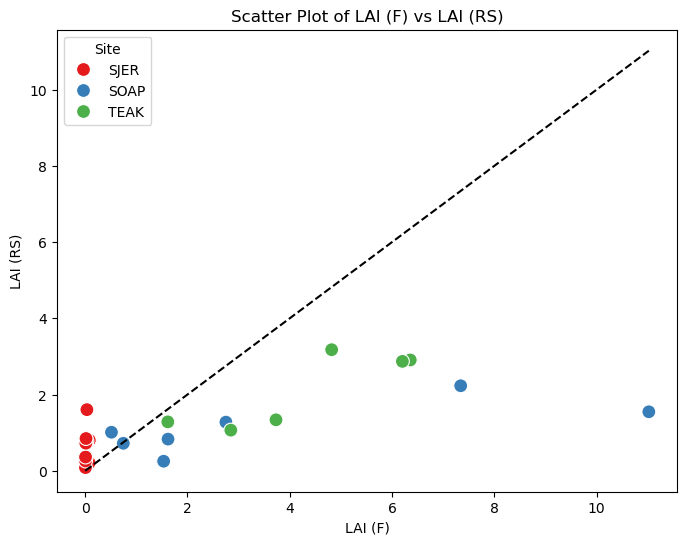

In [23]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=comb_df, x='lai_f', y='lai_rs', hue='site', palette='Set1', s=100)

# Add a one-to-one line
max_value = max(comb_df['lai_f'].max(), comb_df['lai_rs'].max())
plt.plot([0, max_value], [0, max_value], color='black', linestyle='--')

# Set plot labels and title
plt.xlabel('LAI (F)')
plt.ylabel('LAI (RS)')
plt.title('Scatter Plot of LAI (F) vs LAI (RS)')

# Show the legend
plt.legend(title='Site')

# Display the plot
plt.show()

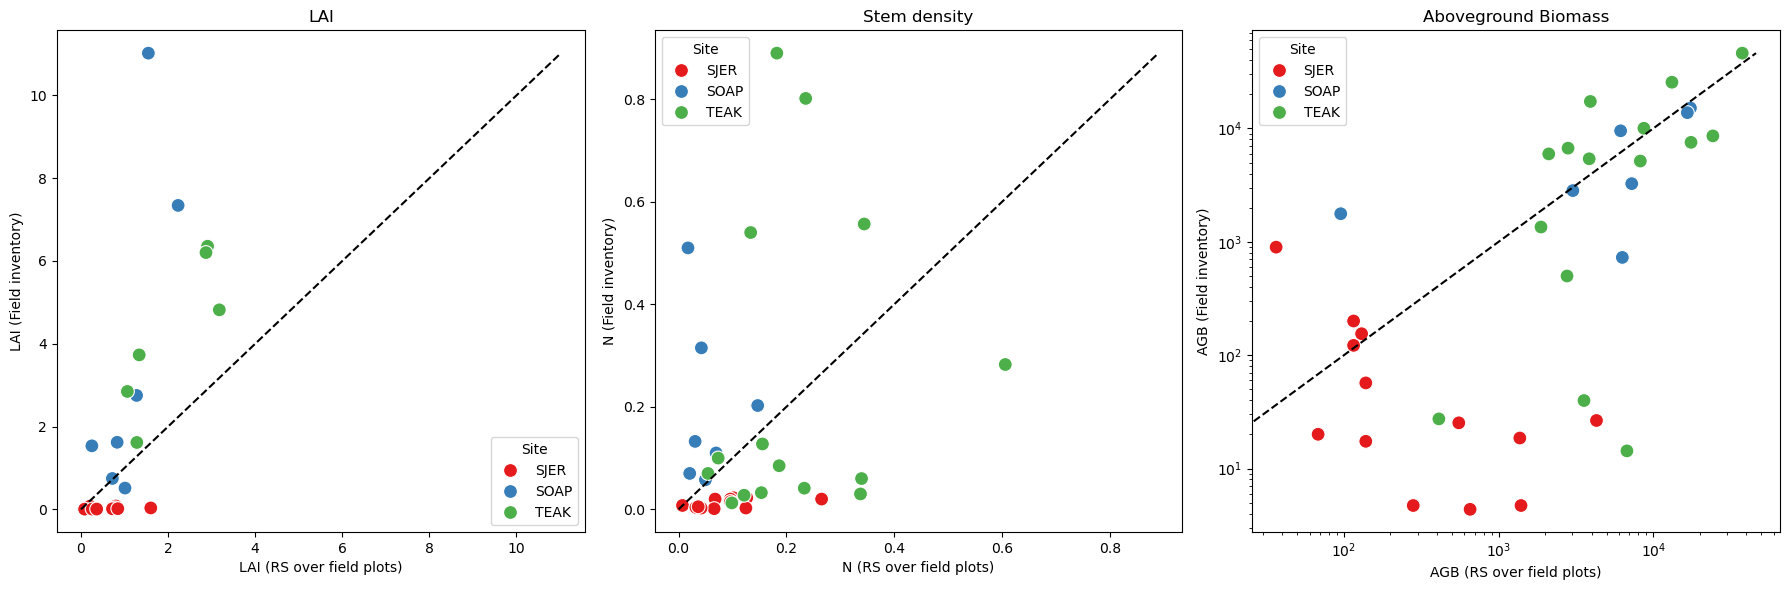

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
plt.xscale('log')
plt.yscale('log')
# Plot 1: LAI (F) vs. LAI (RS)
sns.scatterplot(data=comb_df, x='lai_rs', y='lai_f', hue='site', palette='Set1', s=100, ax=axes[0])
max_value_lai = max(comb_df['lai_f'].max(), comb_df['lai_rs'].max())
axes[0].plot([0, max_value_lai], [0, max_value_lai], color='black', linestyle='--')
axes[0].set_ylabel('LAI (Field inventory)')
axes[0].set_xlabel('LAI (RS over field plots)')
axes[0].set_title('LAI')
axes[0].legend(title='Site')

# Plot 2: N (F) vs. N (RS)
sns.scatterplot(data=comb_df, x='n_rs', y='n_f', hue='site', palette='Set1', s=100, ax=axes[1])
max_value_n = max(comb_df['n_f'].max(), comb_df['n_rs'].max())
axes[1].plot([0, max_value_n], [0, max_value_n], color='black', linestyle='--')
axes[1].set_ylabel('N (Field inventory)')
axes[1].set_xlabel('N (RS over field plots)')
axes[1].set_title('Stem density')
axes[1].legend(title='Site')

# Plot 3: AGB (F) vs. AGB (RS)
sns.scatterplot(data=comb_df, y='agb_f', x='agb_rs', hue='site', palette='Set1', s=100, ax=axes[2])
max_value_agb = max(comb_df['agb_f'].max(), comb_df['agb_rs'].max())
axes[2].plot([0, max_value_agb], [0, max_value_agb], color='black', linestyle='--')
axes[2].set_ylabel('AGB (Field inventory)')
axes[2].set_xlabel('AGB (RS over field plots)')
axes[2].set_title('Aboveground Biomass')
axes[2].legend(title='Site')

plt.tight_layout()
plt.show()